<a href="https://colab.research.google.com/github/skerryvore/regression_analysis_101/blob/master/notebooks/makgenyene_isochron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Isochron example: the Makgenyene kimberlite, South Africa

The code in this notebook demonstrates analysis of Rb-Sr isotopic data and fitting an iscochron to data for mineral separates and whole rock samples from the Makgenyene kimberlite in South Africa (Brown et al. 1989, https://doi.org/10.1016/0168-9622(89)90015-8).

![image](https://docs.google.com/uc?export=download&id=1XTF-YMinKDeOrfBdSm4QCauKhGpLy0Hd)

[//]: # "<i>Brown, R.W., Allsoppl, H.L., Bristow, J.W. and Smith, C.B., 1989. Improved precision of Rb-Sr dating of kimberlitic micas: An assessment of a leaching technique. Chemical Geology: Isotope Geoscience section, 79(2), pp.125-136.<i>"


### To run the code, run each code cell sequentially. Select the first cell (clickin the cell) and press <b>Shift-Enter</b> (Return), or if you are running the notebook on <b>Google Colab</b>, you can also just click the wee run button (black circle with a small white arrow icon, top left of cell).

### The code in the first few cells just reads the data files, and prints the first few rows of the data tables to the screen.

In [59]:
'''
-------------------------------------------------------------------------------
Notebook example of fitting an isochron to Rb-Sr data, using the dataset from the
Makgenyene kimberlite, South Africa.

Data are published in;

Brown, R.W., Allsoppl, H.L., Bristow, J.W. and Smith, C.B., 1989. Improved precision
of Rb-Sr dating of kimberlitic micas: An assessment of a leaching technique.
Chemical Geology: Isotope Geoscience section, 79(2), pp.125-136.

The isochron is fitted and ages calculated using ordinary least squares (OLS) and
orthogonal direction regression (ODR), which takes account of errors in both the
x and y values.

The data set has been hard-coded here as python dictionaries so that the notebook is
selfcontained, i.e. no data file is required. A more elegant way to deal with the data is
of course to read the data from an Excel or csv file. Code to do this is included,
but commented out below.

------------------------------------------------------- Roderick Brown  24/10/2021
'''
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# setup default font sizes for plot elements
TINY_SIZE = 12
SMALL_SIZE = 14
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)     # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rcParams['figure.figsize'] = (10, 8)

# Read csv files via link to github files online (needs internet)
phl_df = pd.read_csv('https://raw.githubusercontent.com/skerryvore/regression_analysis_101/master/data/makgenyene_phlogopite.csv')
wrk_df = pd.read_csv('https://raw.githubusercontent.com/skerryvore/regression_analysis_101/master/data/makgenyene_wholerock.csv')
cbn_df = pd.read_csv('https://raw.githubusercontent.com/skerryvore/regression_analysis_101/master/data/makgenyene_carbonate.csv')

# Print top 20 rows of phlogopite data table    
phl_df.head(20)

,Sample,Rb [ppm],Rb_error,Sr [ppm],Sr_error,87Rb/86Sr,Rb/Sr_error,87Sr/86Sr,2_sigma,1_sigma
0,63-B2,511,4,35.70,0.5,41.80,0.29,0.781250,0.00024,0.000120
1,63-B3,463,4,29.80,0.4,45.40,0.32,0.787860,0.00060,0.000300
2,64-B1,485,4,911.00,13.7,1.54,0.01,0.712565,0.00007,0.000035
3,64-B2,556,4,43.90,0.7,37.00,0.26,0.772660,0.00060,0.000300
4,64-B3,497,4,15.30,0.2,96.00,0.67,0.897830,0.00084,0.000420
5,65-B1,492,4,1421.00,21.3,1.00,0.01,0.711700,0.00005,0.000025
6,65-B2a,504,4,188.00,2.8,7.76,0.05,0.723560,0.00012,0.000060
7,65-B2b,521,4,146.00,2.2,10.40,0.07,0.727800,0.00010,0.000050
8,65-B3,460,4,30.90,0.5,43.20,0.30,0.783750,0.00066,0.000330
9,66-G1,663,5,35.30,0.5,55.00,0.39,0.803320,0.00015,0.000075


In [60]:
# Print top 2 rows of wholerock data table 
wrk_df.head(2)


,Sample,Rb [ppm],Rb_error,Sr [ppm],Sr_error,87Rb/86Sr,Rb/Sr_error,87Sr/86Sr,2_sigma,1_sigma
0,WR 64,95.2,1,142,2.1,1.94,0.014,0.71431,0.00014,0.000070
1,WR 65,169.0,1,892,13.4,0.55,0.004,0.71034,0.00011,0.000055


In [61]:
# Print top 4 rows of carbonate sample data table 
cbn_df.head(5)

,Sample,Rb [ppm],Rb_error,Sr [ppm],Sr_error,87Rb/86Sr,Rb/Sr_error,87Sr/86Sr,2_sigma,1_sigma
0,CC 02,0.24,0.002,348.0,5.2,0.002,0.000,0.717130,0.00028,0.000140
1,DX 01,1.20,0.010,118.0,1.8,0.030,0.000,0.714650,0.00009,0.000045
2,DX 02,1.31,0.010,16.6,0.2,0.230,0.002,0.714373,0.00024,0.000120
3,TD 01,1.06,0.008,10.6,0.2,0.290,0.002,0.719440,0.00048,0.000240


### Code in the next cell will plot a graph of 87Sr/86Sr versus 1/Sr concentration as a way of inspecting/evaluating Sr contamination from carbonate. Carbonate typically has very high Sr, because Sr behaves chemically like Ca, and so samples with low background Sr values show the effect of contamination most. In this case the potential carbonate contamonation is from crustal carbonate which has high 87Sr/86Sr of c. 0.71+


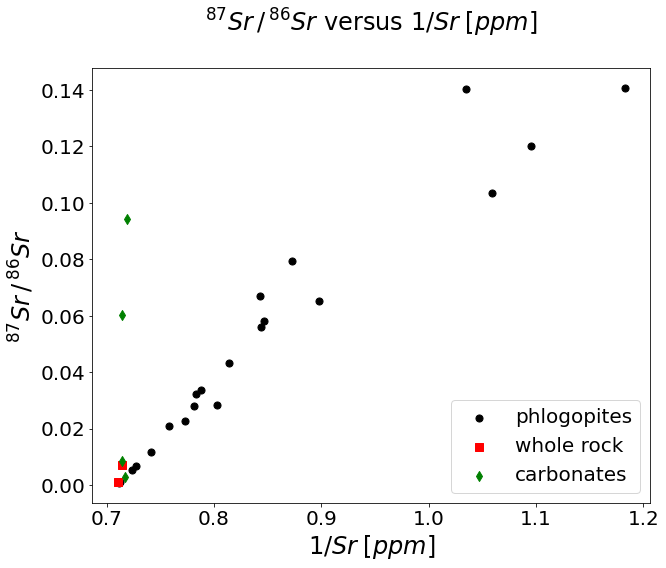

In [62]:
# Setup dictionaries of values for default plotting styles
phlog_style = {'marker':'o','s':50,'color':'k','label':'phlogopites'}
whrk_style  = {'marker':'s','s':50,'color':'r','label':'whole rock'}
carbn_style = {'marker':'d','s':50,'color':'g','label':'carbonates'}

# Plot 87Sr/86Sr versus 1/total Sr
fig1, ax1 = plt.subplots() 

ax1.set_title("$^{87}Sr\,/\,^{86}Sr$ versus $1/Sr\;[ppm]$\n")
ax1.set_ylabel("$^{87}Sr\,/\,^{86}Sr$")
ax1.set_xlabel("$1/Sr\;[ppm]$")

ax1.scatter(np.array(phl_df['87Sr/86Sr']), 1/np.array(phl_df['Sr [ppm]']), **phlog_style)
ax1.scatter(np.array(wrk_df['87Sr/86Sr']), 1/np.array(wrk_df['Sr [ppm]']), **whrk_style)
ax1.scatter(np.array(cbn_df['87Sr/86Sr']), 1/np.array(cbn_df['Sr [ppm]']), **carbn_style)

ax1.legend(loc='lower right')

plt.show(fig1)



### Plot an isochron diagram for the data, and evaluate whether a straight line fit is likely to produce a sensible age?

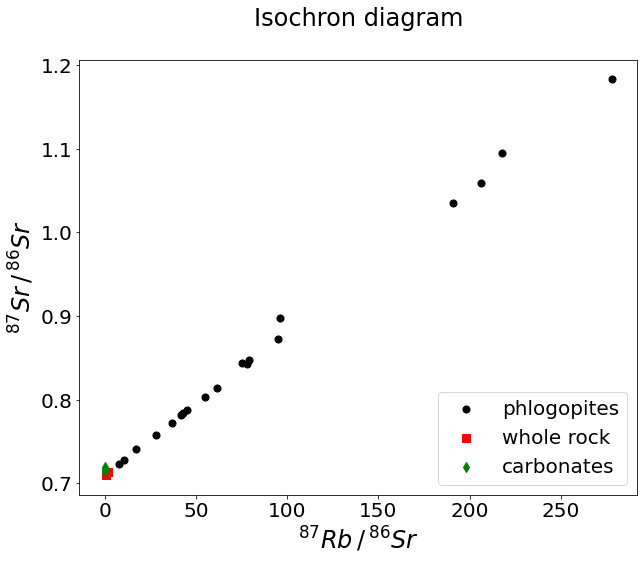

In [63]:
# Plot isochron diagram, 87Sr/86Sr on y-axis versus 87Rb/86Sr on the x-axis

fig2, ax1 = plt.subplots() 

ax1.set_title("Isochron diagram\n")
ax1.set_ylabel("$^{87}Sr\,/\,^{86}Sr$")
ax1.set_xlabel("$^{87}Rb\,/\,^{86}Sr$")
        
# Plot each data set
ax1.scatter(np.array(phl_df['87Rb/86Sr']), np.array(phl_df['87Sr/86Sr']), **phlog_style)
ax1.scatter(np.array(wrk_df['87Rb/86Sr']), np.array(wrk_df['87Sr/86Sr']), **whrk_style)
ax1.scatter(np.array(cbn_df['87Rb/86Sr']), np.array(cbn_df['87Sr/86Sr']), **carbn_style)

# Draw the legend for the plot
ax1.legend(loc='lower right')

plt.show()

### To fit a straight line, i.e. an isochron, model to the data plotted above we can use a simple linear regression approach which will estimate the "best fit" line and return the slope and intercept values for the fitted line. The code below calls the scipy Ordinary Least Squares routine called <b>stats.linregress</b> and writes some useful values to the screen.

In [64]:
# Fit isochron using ordinary least squares regression

from scipy import stats

# Create some 1D arrays called x,y, xerr, and yerr for simplicity
x = np.array(phl_df['87Rb/86Sr'])
y = np.array(phl_df['87Sr/86Sr'])
xerr = np.array(phl_df['Rb/Sr_error'])
yerr = np.array(phl_df['1_sigma'])

# Call the scipy.stats.linregress routine with x and y arrays (defined above) as arguments
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# Print some of the returned values of interest
print (f'OLS slope: {slope:10.8f} +/- {std_err:10.8f}')
print (f'OLS intercept: {intercept:08.6f}')
print (f'R^2 value: {r_value**2:06.4f}')
print (f'p value: {p_value:08.6f}')


OLS slope: 0.00171679 +/- 0.00001738
OLS intercept: 0.711082
R^2 value: 0.9981
p value: 0.000000


### We can use the estimated slope value for the line fitted using least squares regression to calculate the age of the kimblerlite. 

### To calculate the age, $t$ after we determine the slope of the isochron line we can use this equation;

\begin{align}
 t = \ln \left (\frac{slope+1}{\lambda}\right)
\end{align}

### where $\ln$ means the natural logarithm, and $\lambda$ is the decay constant for $^{87}\mathrm{Rb}$.


In [65]:
# Calculate the age in My using the slope
lamda87Rb = 1.419E-11 # decay constant for 87Rb in 1/yr

age = (np.log(slope +1)/lamda87Rb)/1.E6 # Divide by 1.E6 to convert to Ma

# Calculate the error on the age from the estimated std_err on the slope
relative_err = std_err/slope   # calculate the relative error
age_err_ols = age*relative_err # calculate the absolute error on the age

print (f'Age: {age:06.2f} +/- {age_err_ols:3.2f} Ma')


Age: 120.88 +/- 1.22 Ma


### And now let's plot the fitted isochron model line and the data together on an isochron diagram.

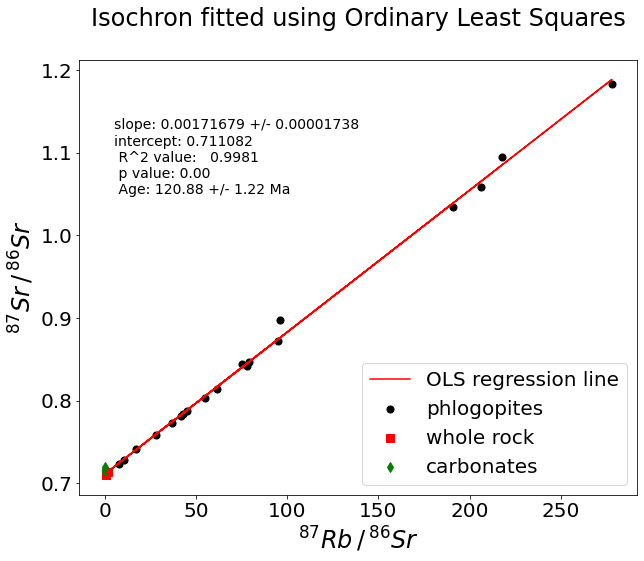

In [70]:
# Plot the isochron diagram and the fitted line, and print the useful values

fig3, ax1 = plt.subplots() 

ax1.set_title("Isochron fitted using Ordinary Least Squares\n")
ax1.set_ylabel("$^{87}Sr\,/\,^{86}Sr$")
ax1.set_xlabel("$^{87}Rb\,/\,^{86}Sr$")

# Plot the data points
ax1.scatter(np.array(phl_df['87Rb/86Sr']), np.array(phl_df['87Sr/86Sr']), **phlog_style)
ax1.scatter(np.array(wrk_df['87Rb/86Sr']), np.array(wrk_df['87Sr/86Sr']), **whrk_style)
ax1.scatter(np.array(cbn_df['87Rb/86Sr']), np.array(cbn_df['87Sr/86Sr']), **carbn_style)

# Plot the fitted isochron line
ax1.plot(x,((x*slope) + intercept), 'r-',label='OLS regression line') # Plot the fitted line

ax1.legend(loc='lower right')

# Write the stats for the fitted line on the graph
ax1.text(5.,1.05,\
f'slope: {slope:10.8f} +/- {std_err:10.8f}\n\
intercept: {intercept:08.6f}\n \
R^2 value: {r_value**2:8.4f}\n \
p value: {p_value:04.2f}\n \
Age: {age:06.2f} +/- {age_err_ols:3.2f} Ma',fontsize='14')

# Write plot to pdf file. Change file extension to *.png or *.tif as required)
#plt.savefig('makgenyene_isochron.pdf', format='pdf')

# Show the plot on screen
plt.show()


### Note that there is one sample point that lies significantly above the isochron line, it is sample 64-B3 (with a 87Rb/86Sr value of c. 100 and an 87Sr/86Sr value of c. 0.9). This is one of the samples that was etched severley and may be indicating it has lost Rb? Let's rerun the analysis excluding this sample, and see if it makes a difference. The code in the next cell will make a copy of the phlogopite data, but will exclude sample 64-B3. 

In [71]:
# Copy the phlogopite dataframe, but exclude the row for sample 64-B3
phl_df_new = phl_df[(phl_df.Sample != '64-B3')]

excluded_df = phl_df[(phl_df.Sample == '64-B3')] # Save a copy of 64-B3 to plot separately

phl_df_new.head(6)
                     

,Sample,Rb [ppm],Rb_error,Sr [ppm],Sr_error,87Rb/86Sr,Rb/Sr_error,87Sr/86Sr,2_sigma,1_sigma
0,63-B2,511,4,35.7,0.5,41.80,0.29,0.781250,0.00024,0.000120
1,63-B3,463,4,29.8,0.4,45.40,0.32,0.787860,0.00060,0.000300
2,64-B1,485,4,911.0,13.7,1.54,0.01,0.712565,0.00007,0.000035
3,64-B2,556,4,43.9,0.7,37.00,0.26,0.772660,0.00060,0.000300
5,65-B1,492,4,1421.0,21.3,1.00,0.01,0.711700,0.00005,0.000025
6,65-B2a,504,4,188.0,2.8,7.76,0.05,0.723560,0.00012,0.000060


### Now let's rerun the analysis, and plot the new isochron diagram and look at the estimated age and associated errors. Is this new age estimate different?

New values excluding sample 64-B3
--------------------------------
OLS slope: 0.00171366 +/- 0.00000950
OLS intercept: 0.710231
R^2 value: 0.9994
p value: 0.000000
Age: 120.66 +/- 0.67 Ma


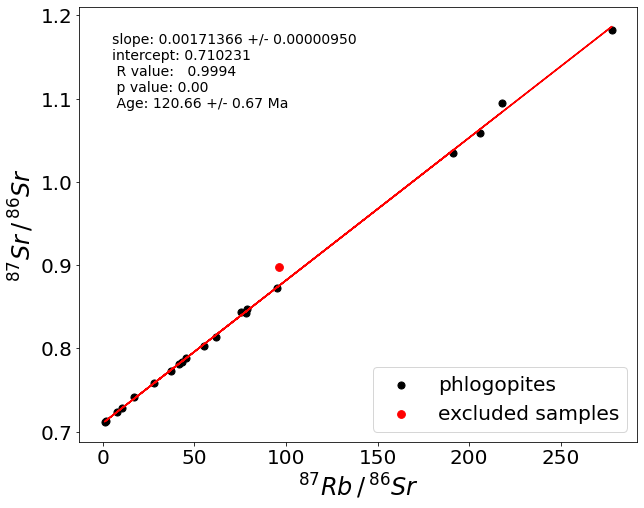

In [76]:
# Create new 1D arrays called x,y, xerr, and yerr for simplicity
x = np.array(phl_df_new['87Rb/86Sr'])
y = np.array(phl_df_new['87Sr/86Sr'])
xerr = np.array(phl_df_new['Rb/Sr_error'])
yerr = np.array(phl_df_new['1_sigma'])

# Call the scipy.stats.linregress routine with x and y arrays (defined above) as arguments
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# Print some of the returned values of interest
print ('New values excluding sample 64-B3\n--------------------------------')
print (f'OLS slope: {slope:10.8f} +/- {std_err:10.8f}')
print (f'OLS intercept: {intercept:08.6f}')
print (f'R^2 value: {r_value**2:06.4f}')
print (f'p value: {p_value:08.6f}')

age = (np.log(slope +1)/lamda87Rb) /1.E6

# Calculate the error on the age from the estimated std_err on the slope
relative_err = std_err/slope   # calculate the relative error
age_err_ols = age*relative_err # calculate the absolute error on the age

print (f'Age: {age:06.2f} +/- {age_err_ols:3.2f} Ma')

# Plot the isochron diagram and the fitted line, and print the useful values

fig31, ax1 = plt.subplots() 

ax1.set_ylabel("$^{87}Sr\,/\,^{86}Sr$")
ax1.set_xlabel("$^{87}Rb\,/\,^{86}Sr$")

# Plot the data points
ax1.scatter(np.array(phl_df_new['87Rb/86Sr']), np.array(phl_df_new['87Sr/86Sr']), **phlog_style)
ax1.scatter(np.array(excluded_df['87Rb/86Sr']), np.array(excluded_df['87Sr/86Sr']), color='red', s=60, label='excluded samples')

ax1.legend(fontsize='x-large',loc='lower right')

# Plot the fitted isochron line
plt.plot(x,((x*slope) + intercept), 'r-',label='OLS regression line') # Plot the fitted line

# Write the stats for the fitted line on the graph
plt.text(5.,1.05,\
f'slope: {slope:10.8f} +/- {std_err:10.8f}\n\
intercept: {intercept:08.6f}\n \
R value: {r_value**2:8.4f}\n \
p value: {p_value:04.2f}\n \
Age: {age:06.2f} +/- {age_err_ols:3.2f} Ma\n\n',fontsize='14')

# Write plot to pdf file. Change file extension to *.png or *.tif as required)
#plt.savefig('makgenyene_isochron.pdf', format='pdf')

# Show the plot on screen
plt.show()


### The problem with simple ordinary least squares regression is that it does not account for the measurement uncertainties on the measured data, and the estimated standard errpr on the slope is only based on the variance from a perfect straight line. There are other regression methods we can use that DO take account of the measurement uncertainties on the data, and the fitted line and the estimated uncertainties take account of these explicitly. 

### The code in the next cell applies Orthogonal Direction Regression (ODR) to fit the isochron and reports the slope, initial ratio and the age all with estimated uncertainties. These model parameters, and their respective uncertainties, are based on the data and the uncertainties on the data.

In [83]:
import scipy.odr.odrpack as odrpack

# Scipy's ODR, Orthogonal Distance Regression library (errors on x, y data included)
#-----------------------------------------------------------

def linear(B,x): # linear model with array values B[0] as slope and B[1] as intercept
    return(B[0]*x + B[1])

# Do ODR regression
#---------------------------------------------------------------------
# Instantiate a model object using the linear model defined above
model = odrpack.Model(linear)

# Instantiate a real data object to hold the observed data
data = odrpack.RealData(x, y, sx=xerr, sy=yerr)

# Pass data object and spherical model object to ODR solver
odrsolver = odrpack.ODR(data, model, beta0=[1.,1.])

# Run the ODR object and store output in myoutput#
myoutput = odrsolver.run()

# Print summary of output of ODR to stdout (i.e. screen)
#myoutput.pprint()

# Extract some useful stats and store them in named variables to use later
slope_odr=myoutput.beta[0]
err_slope_odr=myoutput.sd_beta[0]
intercept_odr=myoutput.beta[1]
err_intercept_odr=myoutput.sd_beta[1]
                   
# Print essential parameters and error estimates to stdout, i.e. screen
print ('\nODR regression results\n---------------------------------------')
print (f'slope: {slope_odr:08.6f}  +/-  {err_slope_odr:10.6f}')
print (f'intercept: {intercept_odr:08.6f}  +/- {err_intercept_odr:10.6f}\n')

# Calculate the age using the ODR slope
age_odr = (np.log(slope_odr +1)/lamda87Rb) /1.E6

# Calculate the error on the age from the estimated std_err on the slope
relative_err = err_slope_odr/slope_odr
age_err_odr = age*relative_err

print (f'ODR Age: {age_odr:06.2f} +/- {age_err_odr:3.2f} Ma')




ODR regression results
---------------------------------------
slope: 0.001722  +/-    0.000008
intercept: 0.709972  +/-   0.000054

ODR Age: 121.22 +/- 0.54 Ma


### Let's plot a summmary isochron diagram showing both models, the Ordinary Least Squares (OLS) model and the Orthogonal Direction Regression (ODR) model. In ths plot the error bars (showing the measurement uncertainties on the data) are also plotted. These are so small that the symbol size of most data points obscures these, but there is one data point whic has a large uncertainty on the 87Sr/86Sr value that is clearly visible.

### Are the ages estimated using the different approaches different? Think about the estimates AND their estimated errors (these errors are at the 1 sigma level).

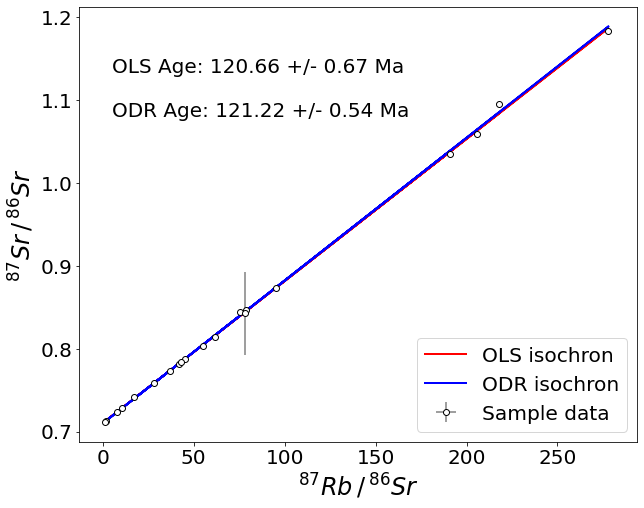

In [85]:
# Plot the isochron diagram and the fitted line, and print the useful values

fig4, ax1 = plt.subplots() 

ax1.set_ylabel("$^{87}Sr\,/\,^{86}Sr$")
ax1.set_xlabel("$^{87}Rb\,/\,^{86}Sr$")

# Place all kwargs for xy data plot style in a dictionary, arguably tidier and easier to read/edit
style_data = {'marker':'o','markersize':6, 'markeredgecolor':'k',\
              'elinewidth':1.5,'linewidth':0, 'ecolor':'gray'}
ax1.errorbar(x, y, yerr, xerr, **style_data, markerfacecolor='w',label='Sample data')

# Plot ODR isochron
# Place all kwargs for plot style in a dictionary. tidier and easier to read/edit
style_odr={'color':'blue','linewidth':2,'linestyle':'-','label':'ODR isochron'}
style_ols={'color':'red','linewidth':2,'linestyle':'-','label':'OLS isochron'}


# Plot the fitted isochron lines
ax1.plot(x,((x*slope) + intercept), **style_ols) # Plot OLS  fitted line
ax1.plot(x,(slope_odr*x+intercept_odr), **style_odr) # Plot ODR  fitted line

# Write the stats for the fitted line on the graph
ax1.text(5.,1.08,\
f'OLS Age: {age:06.2f} +/- {age_err_ols:3.2f} Ma \n\n\
ODR Age: {age_odr:06.2f} +/- {age_err_odr:3.2f} Ma',fontsize='20')

ax1.legend(loc='lower right',fontsize='x-large')

# Write plot to pdf file. Change file extension to *.png or *.tif as required)
plt.savefig('makgenyene_isochrons.pdf', format='pdf')

plt.show()
